<ipython-input-1-0f55643970a8>:49: UserWarning: The following kwargs were not used by contour: 'label', 'fontsize'
  plt.contour(mu,phi,F,levels=[0],colors='royalblue',linewidths=2,linestyles="dashed",label="Critical Set", fontsize=10)


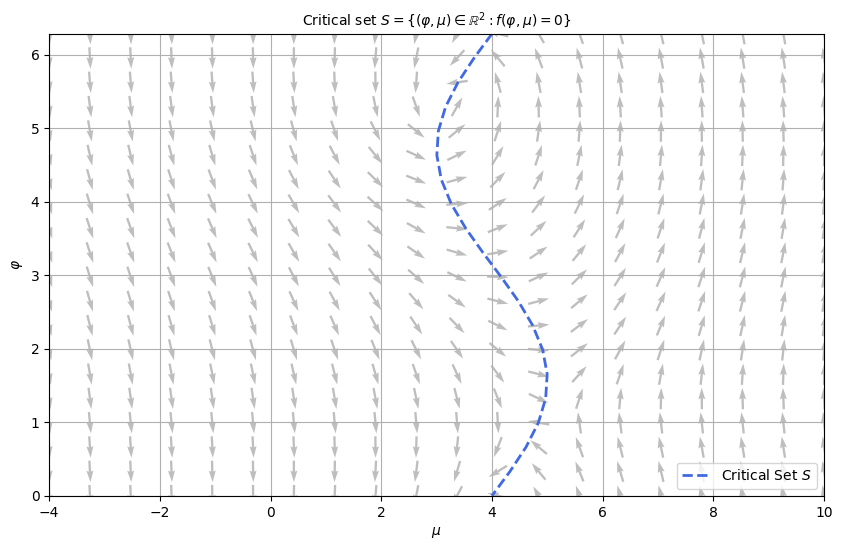

In [1]:
import matplotlib.pyplot as plt
import numpy as np


#Parameters of the system
omega=-4
eta=10
alpha=np.pi/2
epsilon=0.1

def f(mu,phi):
    """
    This is a function corresponding to the derivative with respect to the fast time t of phi, the phase of the neuron.
    Vars:
        mu: float
        phi: float
    """
    return omega+mu-np.sin(phi)

def g(mu,phi):
    """
    This is a function corresponding to the derivative with respect to the fast time t of mu, which is a slowly varying adaptive input
    Vars:
        mu: float
        phi: float
    """
    return epsilon*(-mu+eta*(1-np.sin(phi+alpha)))

phi=np.linspace(0, 2*np.pi, 20)  #Here we are creating 20 evenly spaced values for phi in between 0 and 2*pi
mu=np.linspace(-4,10,20)  #Here we are creating 20 evenly spaced values for mu in between -2 and 2
mu,phi=np.meshgrid(mu,phi)  #Here we are creating a grid of phi and mu values in order to visualize the system in 2D

phi_dot=f(mu,phi)  #This is a matrix formed by the values of the derivative of phi across the grid. We use the function f defined above in order to evaluate it.
mu_dot=g(mu,phi)  #This is a matrix formed by the values of the derivative of mu across the grid. We use the function g defined above in order to evaluate it.

magnitude=np.sqrt(phi_dot**2+mu_dot**2) #Computes the magnitutes of the vectors.
phi_dot=phi_dot/magnitude #Normalization of vector
mu_dot=mu_dot/magnitude #Normalization of vector

#Plotting of the vector field and the Critical set S
plt.figure(figsize=(10,6))
plt.quiver(mu,phi,mu_dot,phi_dot,color="darkgrey",pivot="mid",alpha=0.75)
plt.title("Critical set $S=\\{(\\varphi,\\mu)\\in \\mathbb{R}^2:f(\\varphi,\\mu)=0\\}$", fontsize=10)
plt.xlabel("$\\mu$", fontsize=10)
plt.ylabel("$\\varphi$", fontsize=10)
plt.grid()

F=f(mu,phi)
plt.contour(mu,phi,F,levels=[0],colors='royalblue',linewidths=2,linestyles="dashed",label="Critical Set", fontsize=10)

plt.plot([], [], color='royalblue', linestyle='dashed', linewidth=2, label="Critical Set $S$")
plt.legend(loc="lower right")
plt.show()
